In [300]:
import numpy as np 
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

import missingno as msno #visualises missing values
from wordcloud import WordCloud #to find the most frequent words 

In [301]:
#data that was scraped from source
scrape = "https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest.csv"

#### Pre-Processing(data cleaning):
- loading
- peeking
- general info

In [290]:
#loading data 
df = pd.read_csv(scrape)

/var/folders/0m/sz8j8cn52wl69dlv6r81z4f00000gn/T/ipykernel_6815/1039849880.py:2: DtypeWarning:

Columns (12,14,18,21,24,25,29,34) have mixed types. Specify dtype option on import or set low_memory=False.



In [291]:
df.head()

,ID,Status,Location,City,Country,Country_ISO3,Age,Gender,Date_onset,Date_confirmation,...,Source,Source_II,Source_III,Source_IV,Source_V,Source_VI,Source_VII,Date_entry,Date_death,Date_last_modified
0,N1,confirmed,Guy's and St Thomas Hospital London,London,England,GBR,NaN,NaN,2022-04-29,2022-05-06,...,https://www.gov.uk/government/news/monkeypox-c...,https://www.who.int/emergencies/disease-outbre...,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
1,N2,confirmed,Guy's and St Thomas Hospital London,London,England,GBR,NaN,NaN,2022-05-05,2022-05-12,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
2,N3,confirmed,London,London,England,GBR,NaN,NaN,2022-04-30,2022-05-13,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
3,N4,confirmed,London,London,England,GBR,NaN,male,NaN,2022-05-15,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
4,N5,confirmed,London,London,England,GBR,NaN,male,NaN,2022-05-15,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18


In [292]:
df.tail() #addressed results a few lines down

,ID,Status,Location,City,Country,Country_ISO3,Age,Gender,Date_onset,Date_confirmation,...,Source,Source_II,Source_III,Source_IV,Source_V,Source_VI,Source_VII,Date_entry,Date_death,Date_last_modified
38996,E2741,suspected,Kwara,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-12,NaN,2022-08-12
38997,E2742,suspected,Kwara,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-12,NaN,2022-08-12
38998,E2743,suspected,Gombe,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-12,NaN,2022-08-12
38999,E2744,suspected,Nasarawa,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-12,NaN,2022-08-12
39000,E2745,suspected,Rivers,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-12,NaN,2022-08-12


In [293]:
#number of countries with monkeypox cases
len(df["Country"].unique())

113

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39001 entries, 0 to 39000
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       39001 non-null  object 
 1   Status                   39001 non-null  object 
 2   Location                 27415 non-null  object 
 3   City                     1204 non-null   object 
 4   Country                  39001 non-null  object 
 5   Country_ISO3             39001 non-null  object 
 6   Age                      2589 non-null   object 
 7   Gender                   2120 non-null   object 
 8   Date_onset               54 non-null     object 
 9   Date_confirmation        36196 non-null  object 
 10  Symptoms                 197 non-null    object 
 11  Hospitalised (Y/N/NA)    292 non-null    object 
 12  Date_hospitalisation     32 non-null     object 
 13  Isolated (Y/N/NA)        412 non-null    object 
 14  Date_isolation        

In [295]:
#to see the number of missing values in the dataset

df.isnull().sum() 

ID                             0
Status                         0
Location                   11586
City                       37797
Country                        0
Country_ISO3                   0
Age                        36412
Gender                     36881
Date_onset                 38947
Date_confirmation           2805
Symptoms                   38804
Hospitalised (Y/N/NA)      38709
Date_hospitalisation       38969
Isolated (Y/N/NA)          38589
Date_isolation             38985
Outcome                    38913
Contact_comment            38912
Contact_ID                 38974
Contact_location           38995
Travel_history (Y/N/NA)    38669
Travel_history_entry       38966
Travel_history_start       38993
Travel_history_location    38897
Travel_history_country     38910
Genomics_Metadata          38977
Confirmation_method        38904
Source                         0
Source_II                  34106
Source_III                 38321
Source_IV                  38949
Source_V  

##### Although there a quite a few missing values in some columns, these values are not of much importance as they do not affect the integrity of core information such as the number of confirmed cases.

### Exploratory Data Analysis (EDA)

In [296]:
df["Country"].value_counts()

United States    11372
Spain             5905
Germany           3102
Brazil            2933
England           2883
                 ...  
Bermuda              1
Zambia               1
Barbados             1
Fiji                 1
Bangladesh           1
Name: Country, Length: 113, dtype: int64

In [297]:
#function that plots the number of monkeypox cases per country (matplotlib & seaborn)
def countrycases():
    plt.figure(figsize=(50,8))
    sns.countplot(x="Country", data=df)
    plt.xticks(rotation=90)
    plt.show()

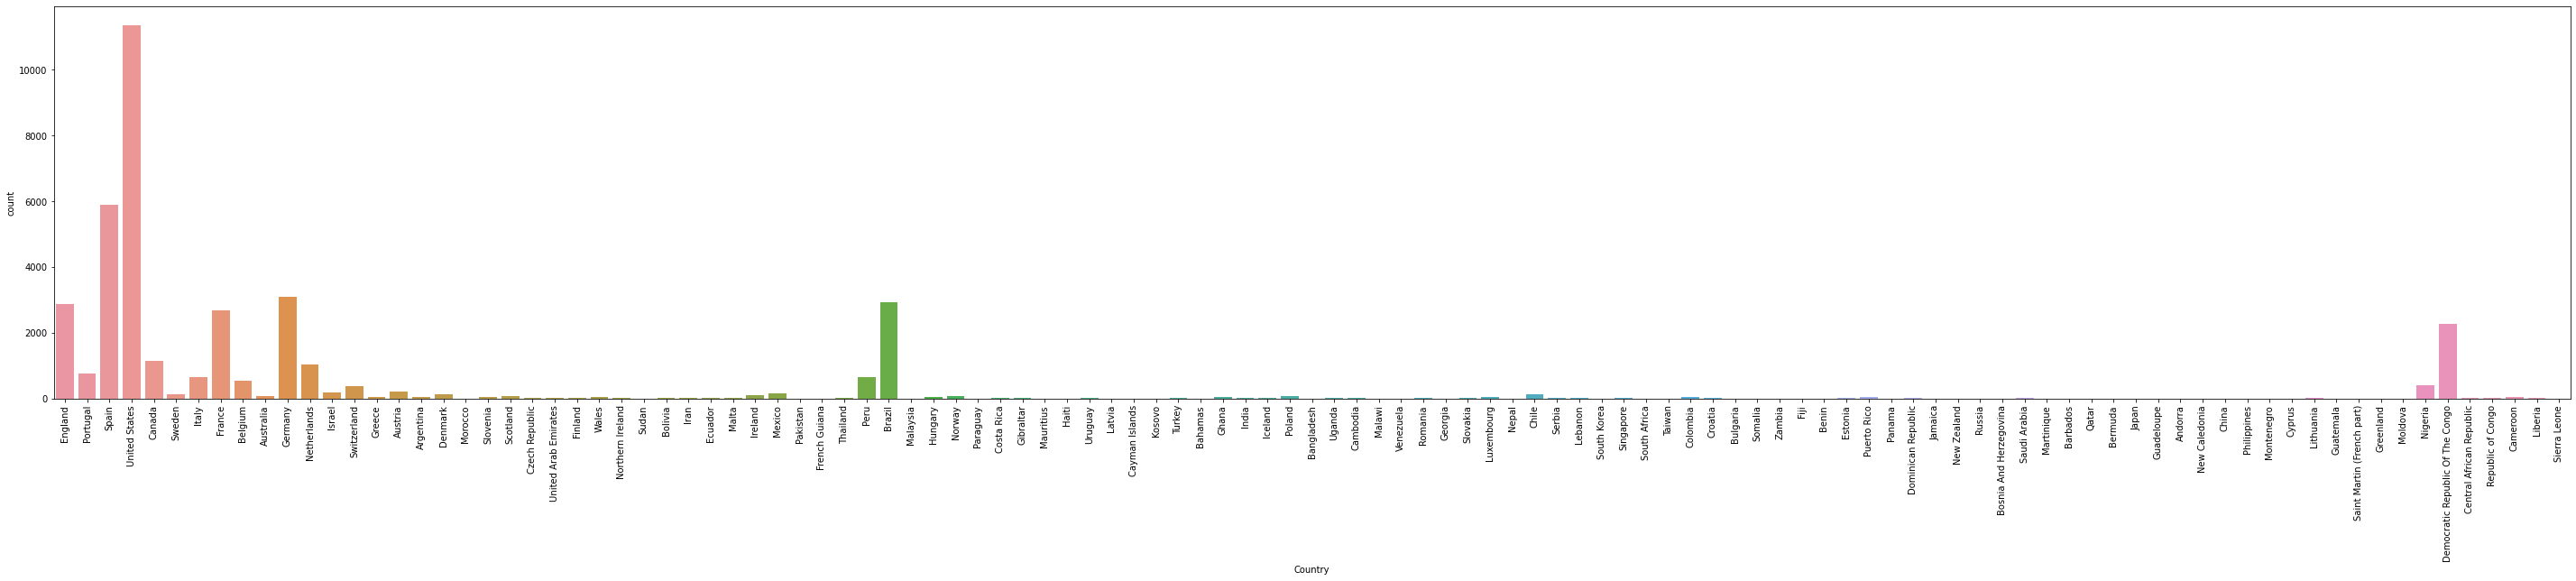

In [298]:
countrycases()

In [299]:
#due to the USA's high monkeypox count i will further breakdown its cases based on cities

#REMEMBER TO REWRITE YOUR CODE, ITS NOT PRINTING IT IN THE FORMAT YOU WANT!!!



df[df["Country"] == "United States"].groupby("City")["Status"].size()

City
Anchorage         2
Austin            1
Boston            1
Chicago           7
Cincinnati        2
Cleveland         1
Dallas            1
Denver            1
Forest Park       1
Houston           2
Kansas City       2
Louisville        2
Milwaukee         1
Nashville         3
Philadelphia      2
Sacramento        1
San Francisco    20
San Francsico    16
St. Louis         1
Washington DC     1
Name: Status, dtype: int64